# Identifying Right AD Banner Using MAB



Let us say you are running a website and you have five different banners for the same ad and you want to know which banner attracts the user? We model this problem statement as a bandit problem. Let us say these five banners are five bandits and we assign reward 1 if the user clicks the ad and reward 0 if the user does not click the ad.

In a normal A/B testing, we perform complete exploration of all these five banners alone before deciding which banner is the best. But that will cost us lot of regret. Instead, we will use good exploration strategy for deciding which banner will give us most rewards (most clicks)

 First, let us import necessary libraries

In [ ]:
!pip install gym_bandits

In [ ]:
!pip3 install --upgrade git+git://github.com/JKCooper2/gym-bandits.git

  Cloning git://github.com/JKCooper2/gym-bandits.git to /tmp/pip-req-build-0r2j6_ou
  Running command git clone -q git://github.com/JKCooper2/gym-bandits.git /tmp/pip-req-build-0r2j6_ou
  Created wheel for gym-bandits: filename=gym_bandits-0.0.2-cp37-none-any.whl size=5193 sha256=e56701026ec0c2bb2ef9249b81bf444fe1a6dd3084f168dc8cc361c0ba511a05
  Stored in directory: /tmp/pip-ephem-wheel-cache-i1jxk5rd/wheels/1b/e9/fb/53d13423049f148014d613617d9110a7a05973804b422030cf
Successfully built gym-bandits
  Found existing installation: gym-bandits 0.0.1
    Uninstalling gym-bandits-0.0.1:
      Successfully uninstalled gym-bandits-0.0.1


In [ ]:
import gym_bandits
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
env = gym.make("BanditTenArmedGaussian-v0")

Let us simulate a dataset with 5*10000 as shape where the column is the ad banner type and rows are either 0 or 1 i.e whether the ad has been clicked or not clicked by the user respectively



In [ ]:
df = pd.DataFrame()
df['Banner_type_0'] = np.random.randint(0,2,100000)
df['Banner_type_1'] = np.random.randint(0,2,100000)
df['Banner_type_2'] = np.random.randint(0,2,100000)
df['Banner_type_3'] = np.random.randint(0,2,100000)
df['Banner_type_4'] = np.random.randint(0,2,100000)

In [ ]:
df.head(20)

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,1,1,0,1
1,0,1,0,1,1
2,1,0,0,1,0
3,1,1,1,0,1
4,1,1,0,1,1
5,0,1,0,1,1
6,0,0,1,1,1
7,0,0,0,1,1
8,1,1,1,0,1
9,1,1,1,0,0


First, let us initialize necessary variables

In [ ]:
# number of banners
num_banner = 5

# number of iterations
no_of_iterations = 1000

# list for storing banners which are selected
banner_selected = [] #선택된 배너 저장할 변수

# count number of times the banner was selected
count = np.zeros(num_banner) # 각각의 배너가 선택된 횟수를 저장

# Q value of the banner
Q = np.zeros(num_banner) # 평균 보상이 들어갈 변수

# sum of rewards obtained by the banner
sum_rewards = np.zeros(num_banner) # 보상을 저장할 변수

 Now we define the epsilon greedy policy

In [ ]:
def epsilon_greedy(epsilon):
    
    random_value = np.random.random()
    choose_random = random_value < epsilon
    
    if choose_random:
        action =  np.random.choice(num_banner)
    else:
        action = np.argmax(Q)
    
    return action


In [ ]:
for i in range(no_of_iterations):
    
    # select the banner using epsilon greedy policy
    banner = epsilon_greedy(0.5)
        
    # get the reward
    reward = df.values[i, banner] #banner에 해당되는 열에 값을 reward로 설정한다. 
           
    # update the selected banner count
    count[banner] += 1
    
    # sum the rewards obtained by that banner
    sum_rewards[banner]+=reward
    
    # calculate the Q value of the banner
    Q[banner] = sum_rewards[banner]/count[banner] # 누적보상액 평균값
    
    banner_selected.append(banner)   # 선택된 배너 append 시킨다. 
   
print(Q) # 최종 평균 누적보상액
print(count) 
print(sum_rewards)# reward가장 높은것을 선택하는 것이 좋다. 
#print(banner_selected)

[0.44329897 0.44736842 0.49324324 0.54150943 0.45045045]
[ 97. 114. 148. 530. 111.]
[ 43.  51.  73. 287.  50.]


We can plot and see which banner type gives us most clicks(rewards)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


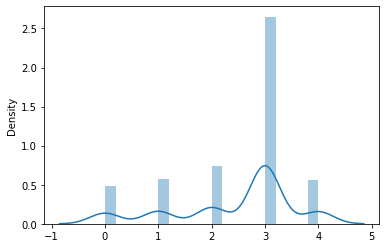

In [ ]:
sns.distplot(banner_selected) # banner가 select된 횟수
# reward가 가장 높은 것을 선택하는 것이 효과적이다.